In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.ticker as mticker 

In [2]:
r_label = 'r_\mathrm{trunc}'

In [3]:
def hs_coeff(r, n):
	return np.pi ** 2 / (n * np.sin(np. pi * r / n))**2 
plt.rc('text.latex', preamble='\\usepackage{amsmath}\n\\usepackage{physics}')

In [4]:
n = 21
df = pd.read_csv(f'../../data/hs_data/hs_truncations_n={n}.csv')

n_ops = df['n_ops'].unique()

evals = []
for i in n_ops: 
	evals.append(np.min(df.loc[df['n_ops'] == i]['evals'].to_numpy()))
evals = np.array(evals)

In [5]:
# Drop lowest eigenvalue
evals = evals[1:]
n_ops = n_ops[1:]

# Get HS coeffs analytically (from highest number of operators in basis)
# hs_anal = np.flip(df.loc[df['n_ops'] == max(n_ops)]['anal'].to_numpy())
r = np.linspace(1, np.max(n_ops), 100)
hs_anal = hs_coeff(r, n)

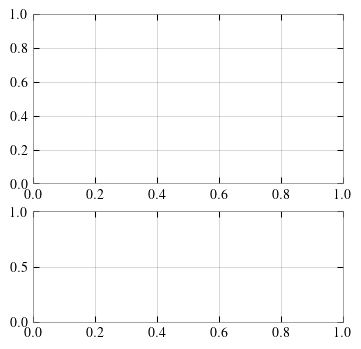

In [6]:
fig, ax = plt.subplots(figsize=(4, 4), nrows=2, gridspec_kw={'height_ratios': [2, 1.3]})

In [7]:
ax[0].plot(r, hs_anal ** 2, label=r'$J_{\textrm{HS}}^2$', color='gray', alpha=0.85, linestyle='dashed')
ax[0].scatter(n_ops, evals / np.linalg.norm(evals), color='black', label='lowest $\lambda$', alpha=0.65)

ax[0].set_ylabel('$ \lambda_0 $')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
# ax[1].set_xlabel('$N$ operators')
ax[0].set_xticks(n_ops)

# Do not use scientific notation for x axis
ax[0].xaxis.set_major_formatter(mticker.ScalarFormatter())

In [8]:
ax[1].plot(n_ops, evals / hs_coeff(n_ops, n)**2, color='black', alpha=0.65)
ax[1].set_ylabel(f'$Q({r_label})$')
ax[1].set_xticks(n_ops)
ax[1].set_xlabel(f'${r_label}$')
ax[1].set_ylim(1e-14, 1e-1)

(1e-14, 0.1)

In [9]:
ax[0].text(0.04, 0.15, '(a)', transform=ax[0].transAxes,
		fontsize=14, va='top')
ax[1].text(0.04, 0.23, '(b)', transform=ax[1].transAxes,
		fontsize=14, va='top')

Text(0.04, 0.23, '(b)')

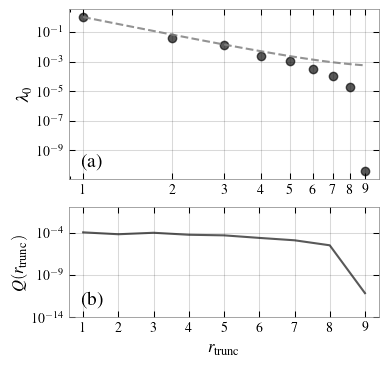

In [10]:
ax[1].set_yscale('log')
fig

In [11]:
fname = "../../paper-figures/drafts/hs-truncation_v0"
fig.savefig(fname + ".pdf")
fig.savefig(fname + ".png")
fig.get_size_inches() * fig.dpi

array([400., 400.])